In [1]:
import sys
import os


# Get the root directory of the project
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the root directory to the system path
sys.path.insert(0, project_root)

# Now you can import watermarking.utils
import watermarking.utils as utils

In [2]:
import pandas as pd 
import os
import json

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
def skip_file(filename, filters):
    # File must contain all filters to be processed
    for f in filters:
        if f not in filename:
            return True
    return False

def get_data(data_dir, filters):
    data = []
    for file in os.listdir(os.path.join("../data/output/", data_dir)):
        if skip_file(file, filters):
            continue
            
        print(file)
        filename = os.path.join("../data/output/", data_dir, file)
        with open(filename) as f:
            file_data = f.read()
            all_data = json.loads(file_data)
            data.append(all_data)
    return [row for each_list in data for row in each_list]

def label_keys(df):
    unique_keys = df["generated_watermark_key"].unique().tolist()
    unique_labels = [chr(ord("A") + x) for x in range(len(unique_keys))]
    # Create following dict: {"key1": "A", "key2": "B", ...}
    key_label_dict = {k: v for k, v in zip(unique_keys, unique_labels)}
    
    for column_name in "generated_watermark_key", "detected_watermark_key":
        df[column_name + "_label"] = df[column_name].apply(lambda x: key_label_dict.get(x, None))
    return df 

def get_df(data_dir, *filters):
    data = get_data(data_dir, filters)
    df = pd.DataFrame(data)
    df = df.rename(columns={"detected_seed": "detected_watermark_key", 
                       "generated_seed": "generated_watermark_key"}
                  )
    return df

df = label_keys(get_df("different_keys_1000_detected", "czech"))
df

czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_23:13:45.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_23:46:14.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_22:08:48.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_22:41:17.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-23_00:51:14.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_21:36:11.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-23_00:18:45.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_21:03:01.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_19:56:50.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_20:29:55.json


,z_score,p_value,error,generated_green_list_size,generated_wm_strength,generated_watermark_key,detected_green_list_size,detected_wm_strength,detected_watermark_key,generated_grSSSeen_list_size,generated_watermark_key_label,detected_watermark_key_label
0,16.211786,None,none,0.5,2,263186576307007295352147629750509737267,0.5,2,263186576307007295352147629750509737267,NaN,A,A
1,18.443793,None,none,0.5,2,263186576307007295352147629750509737267,0.5,2,263186576307007295352147629750509737267,NaN,A,A
2,12.963168,None,none,0.5,2,263186576307007295352147629750509737267,0.5,2,263186576307007295352147629750509737267,NaN,A,A
3,18.704052,None,none,0.5,2,263186576307007295352147629750509737267,0.5,2,263186576307007295352147629750509737267,NaN,A,A
4,16.245539,None,none,0.5,2,263186576307007295352147629750509737267,0.5,2,263186576307007295352147629750509737267,NaN,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,13.457356,None,none,0.5,2,229310508221583949039578669441064310444,0.5,2,229310508221583949039578669441064310444,NaN,J,J
99996,10.328783,None,none,0.5,2,229310508221583949039578669441064310444,0.5,2,229310508221583949039578669441064310444,NaN,J,J
99997,14.332286,None,none,0.5,2,229310508221583949039578669441064310444,0.5,2,229310508221583949039578669441064310444,NaN,J,J
99998,15.385755,None,none,0.5,2,229310508221583949039578669441064310444,0.5,2,229310508221583949039578669441064310444,NaN,J,J


In [4]:
def plot_boxplot(df):
    plt.figure(figsize=(12, 6)) 
    df = df.sort_values(by=['detected_watermark_key_label', 'generated_watermark_key_label'])
    ax = sns.boxplot(df, x="detected_watermark_key_label", y="z_score", hue="generated_watermark_key_label",
               showfliers=False)
    ax.set_xlabel("detected with wm key")
    ax.legend(title="generated with wm key")
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


### Task 1: Detection with different keys 

czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_23:13:45.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_23:46:14.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_22:08:48.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_22:41:17.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-23_00:51:14.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_21:36:11.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-23_00:18:45.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_21:03:01.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_19:56:50.json
czech-BUT-FIT-csmpt7b-UnigramWatermarkedLLM-2024-10-22_20:29:55.json


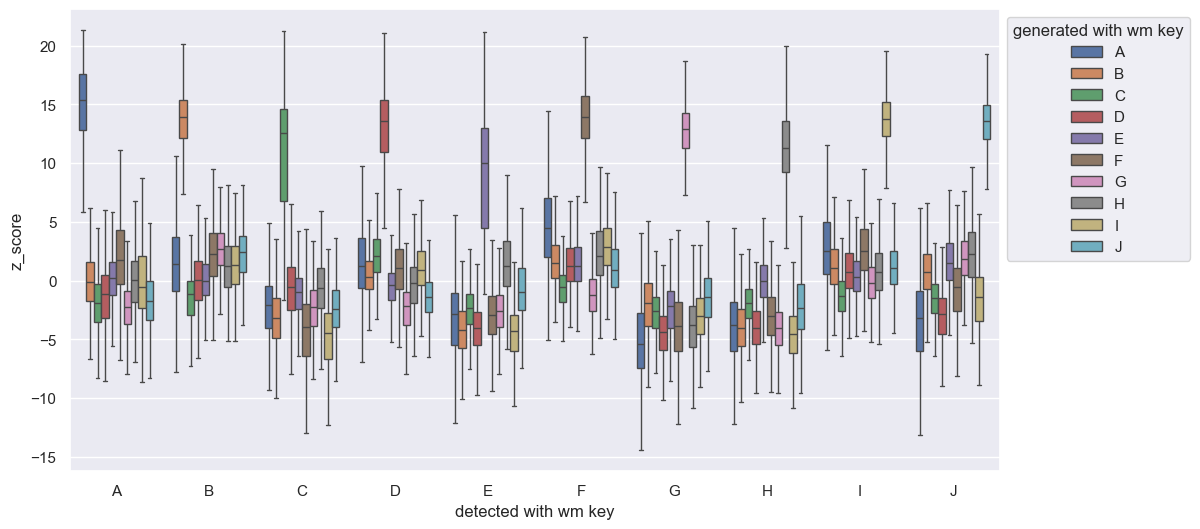

In [5]:
plot_boxplot(label_keys(get_df("different_keys_1000_detected","czech", "UnigramWatermarkedLLM")))

english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_23:11:28.json
english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_19:46:26.json
english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_22:42:18.json
english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_20:45:15.json
english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_19:16:54.json
english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_23:40:38.json
english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_21:43:55.json
english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_21:14:37.json
english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_20:15:51.json
english-meta-llama-Llama-3.1-8B-UnigramWatermarkedLLM-2024-10-22_22:13:07.json


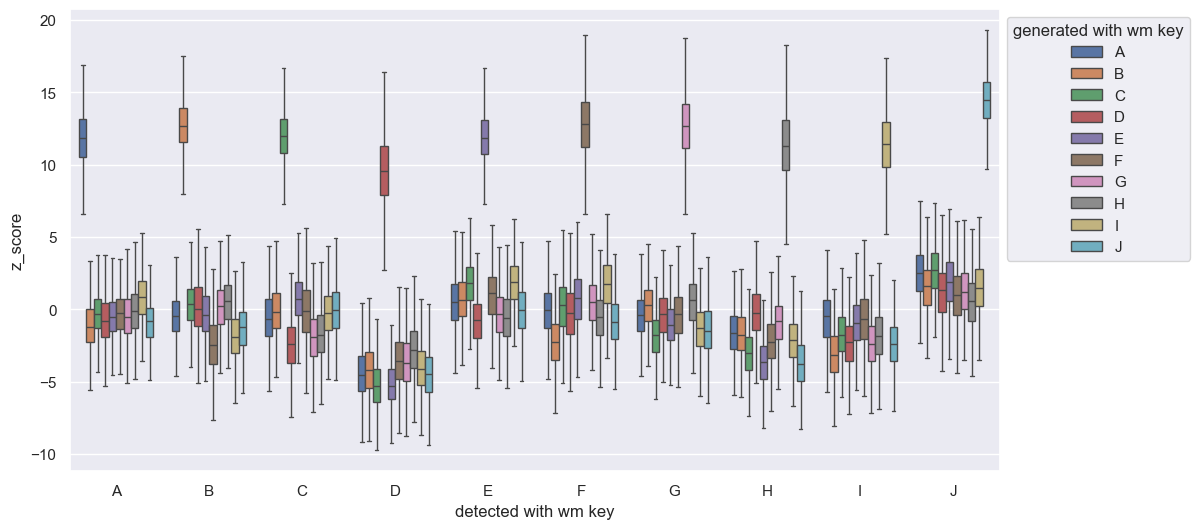

In [6]:
plot_boxplot(label_keys(get_df("different_keys_1000_detected", "english", "UnigramWatermarkedLLM")))

english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_8~tau_0.2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_0~tau_0.2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_4~tau_0.2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_7~tau_0.2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_9~tau_0.2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_2~tau_0.2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_1~tau_0.2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_6~tau_0.2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_3~tau_0.2.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_5~tau_0.2.json


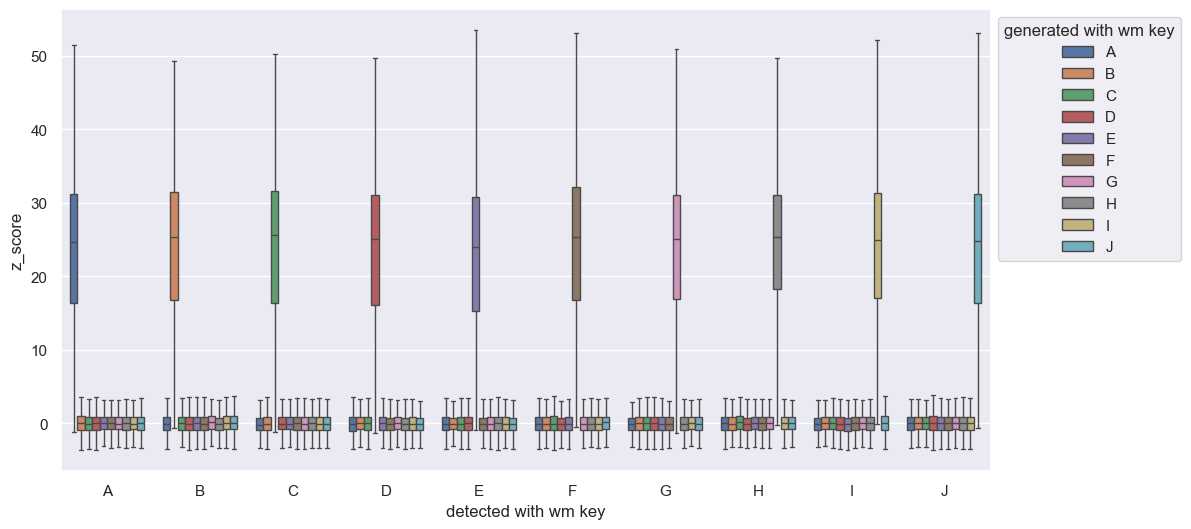

In [7]:
plot_boxplot(label_keys(get_df("different_keys_1000_detected", "english", "GumbelNGramWatermarkedLLM", "tau_0.2")))

english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_8~tau_0.3.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_6~tau_0.3.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_9~tau_0.3.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_7~tau_0.3.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_5~tau_0.3.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_2~tau_0.3.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_1~tau_0.3.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_3~tau_0.3.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_0~tau_0.3.json
english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~repeat_4~tau_0.3.json


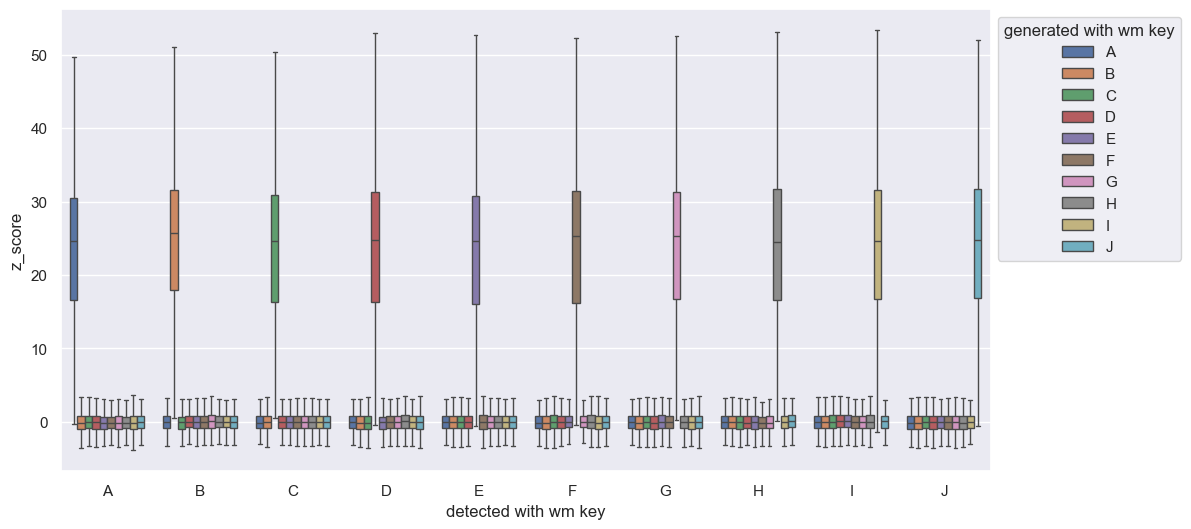

In [8]:
plot_boxplot(label_keys(get_df("different_keys_1000_detected", "english", "GumbelNGramWatermarkedLLM", "tau_0.3")))

czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_4.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_3.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_2.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_1.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_0.json


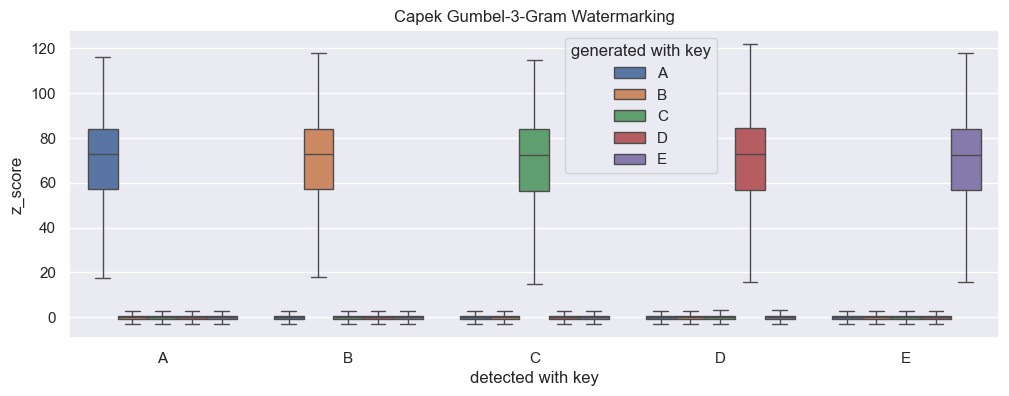

In [39]:
def plot_boxplot(df, title=""):
    plt.figure(figsize=(12, 4)) 
    df = df.sort_values(by=['detected_watermark_key_label', 'generated_watermark_key_label'])
    ax = sns.boxplot(df, x="detected_watermark_key_label", y="z_score", hue="generated_watermark_key_label",
               showfliers=False)
    ax.set_xlabel("detected with key")
    ax.set_title(title)
    ax.legend(title="generated with key")
    sns.move_legend(ax, "upper left", bbox_to_anchor=(0.525, 1))

    
df = label_keys(get_df("different_keys_detected", "czech", "GumbelNGramWatermarkedLLM"))
detected_keys = df['detected_watermark_key_label'].unique()
plot_boxplot(df, title="Capek Gumbel-3-Gram Watermarking")

In [10]:
# plot_boxplot(label_keys(get_df("different_keys_squad_detected", "GumbelNGramWatermarkedLLM")))

for file in os.listdir(os.path.join("../data/output/", "different_keys_squad_detected")):
    print(file)

czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_4.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_3.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_2.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_1.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_0.json


czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_4.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_3.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_2.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_1.json
czech~BUT-FIT-csmpt7b~GumbelNGramWatermarkedLLM~top_p_0.9~repeat_0.json


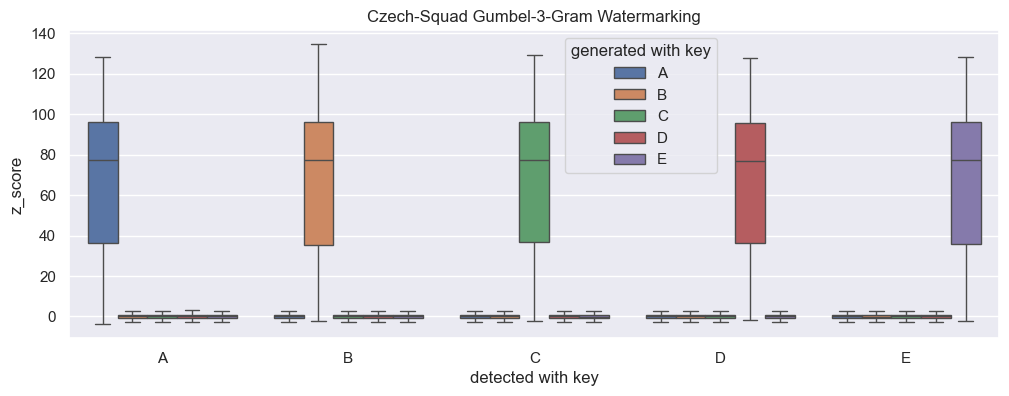

In [41]:
plot_boxplot(
    label_keys(get_df("different_keys_squad_detected", "czech", "GumbelNGramWatermarkedLLM")),
    title="Czech-Squad Gumbel-3-Gram Watermarking"
)

### Task 2: Detection with multiple models

In [60]:
def remove_model_name_prefix(model_name):
    valid_hface_prefixes = ['BUT-FIT', 'meta-llama', 'mistralai', 'google']
    for valid_hface_prefix in valid_hface_prefixes:
        if valid_hface_prefix in model_name:
            return model_name.removeprefix(valid_hface_prefix + '-')
    raise ValueError(
        f"Model name '{model_name}' does not match with any specified prefixes {valid_hface_prefixes}"
    )
    

def plot_boxplot(df, title):
    df['generated_model_name'] = df['generated_model_name'].apply(remove_model_name_prefix)
    df['detected_model_name'] = df['detected_model_name'].apply(remove_model_name_prefix)
    df['detected_model_name'] = df['detected_model_name'].apply(lambda x: x.removesuffix("-2410"))
        
    plt.figure(figsize=(12, 4)) 
    df = df.sort_values(by=['generated_model_name', 'detected_model_name'])
    ax = sns.boxplot(df, x="generated_model_name", y="z_score", hue="detected_model_name",
               showfliers=False)
    ax.set_xlabel("generated model name")
    ax.set_title(title)
    ax.legend(title="detected model name")
    sns.move_legend(ax, "upper left", bbox_to_anchor=(0.35, 1))
    

english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~.json
english~meta-llama-Llama-3.2-3B~GumbelNGramWatermarkedLLM~.json
english~mistralai-Ministral-8B-Instruct-2410~GumbelNGramWatermarkedLLM~.json
english~mistralai-Mistral-7B-v0.3~GumbelNGramWatermarkedLLM~.json


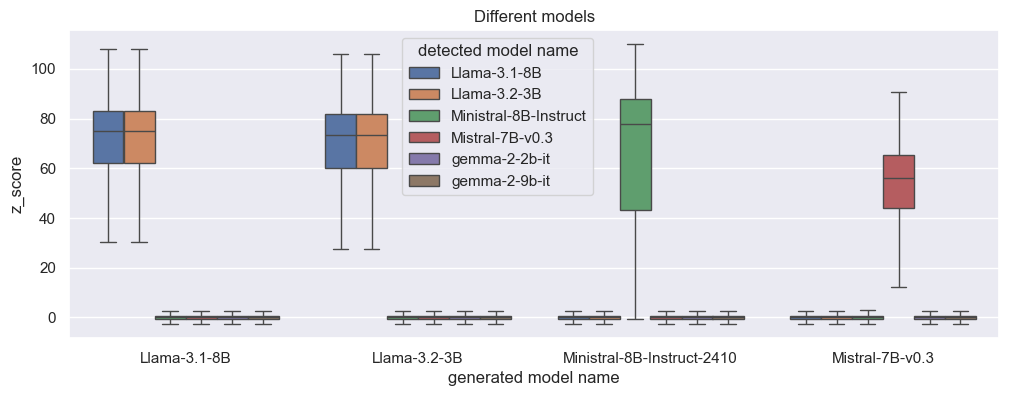

In [61]:
    
plot_boxplot(
    get_df("different_models_detected", "GumbelNGramWatermarkedLLM"),
    title="Different models"
)


english~mistralai-Ministral-8B-Instruct-2410~UnigramWatermarkedLLM~.json
english~mistralai-Mistral-7B-v0.3~UnigramWatermarkedLLM~.json
english~meta-llama-Llama-3.2-3B~UnigramWatermarkedLLM~.json
english~meta-llama-Llama-3.1-8B~UnigramWatermarkedLLM~.json


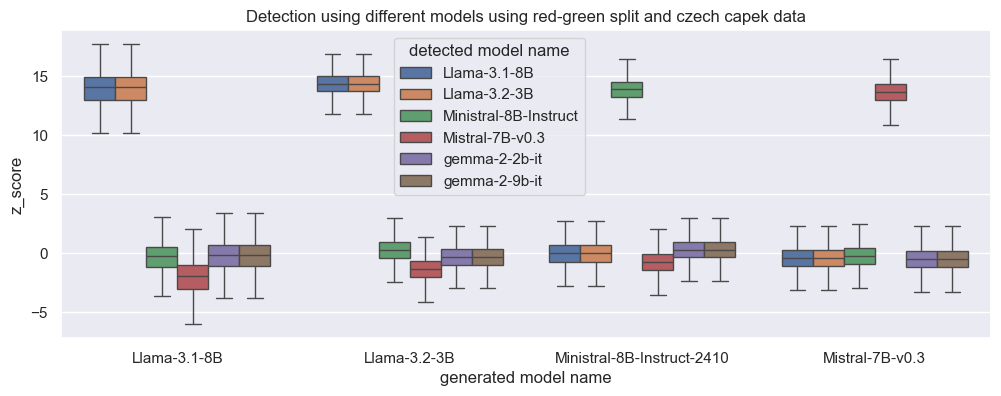

In [63]:
plot_boxplot(
    get_df("different_models_detected", "Unigram"),
    title="Detection using different models using red-green split and czech capek data"
)

In [15]:
df = get_df("different_models_detected", "english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~.json")
df.iloc[:5]

english~meta-llama-Llama-3.1-8B~GumbelNGramWatermarkedLLM~.json


,z_score,p_value,error,generated_class_name,generated_model_name,generated_watermark_key,generated_seeding,generated_hash_key,generated_ngram,generated_tau,...,detected_class_name,detected_model_name,detected_watermark_key,detected_seeding,detected_hash_key,detected_ngram,detected_tau,detected_shift_max,detected_drop_prob,generated_token_len
0,66.524401,1.000000e-200,none,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,...,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,0,0.0,369
1,32.132643,1.000000e-200,none,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,...,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,0,0.0,61
2,20.294667,7.166083e-92,none,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,...,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,0,0.0,82
3,55.169302,1.000000e-200,none,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,...,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,0,0.0,264
4,62.756006,1.000000e-200,none,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,...,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,0,0.0,386


In [16]:
df.iloc[7709:7713]

,z_score,p_value,error,generated_class_name,generated_model_name,generated_watermark_key,generated_seeding,generated_hash_key,generated_ngram,generated_tau,...,detected_class_name,detected_model_name,detected_watermark_key,detected_seeding,detected_hash_key,detected_ngram,detected_tau,detected_shift_max,detected_drop_prob,generated_token_len
7709,83.865858,1.000000e-200,none,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,...,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,0,0.0,418
7710,60.850532,1.000000e-200,none,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,...,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,0,0.0,372
7711,66.524401,1.000000e-200,none,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,...,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.2-3B,1615453454534154,hash,35317,3,0.9,0,0.0,369
7712,32.132643,1.000000e-200,none,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,...,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.2-3B,1615453454534154,hash,35317,3,0.9,0,0.0,61


In [17]:
df.iloc[[7711 * x for x in range(6)]]

,z_score,p_value,error,generated_class_name,generated_model_name,generated_watermark_key,generated_seeding,generated_hash_key,generated_ngram,generated_tau,...,detected_class_name,detected_model_name,detected_watermark_key,detected_seeding,detected_hash_key,detected_ngram,detected_tau,detected_shift_max,detected_drop_prob,generated_token_len
0,66.524401,1.000000e-200,none,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,...,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,0,0.0,369
7711,66.524401,1.000000e-200,none,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,...,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.2-3B,1615453454534154,hash,35317,3,0.9,0,0.0,369
15422,-0.821655,7.943634e-01,none,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,...,GumbelNGramWatermarkedLLM,mistralai-Ministral-8B-Instruct-2410,1615453454534154,hash,35317,3,0.9,0,0.0,369
23133,-1.013506,8.445907e-01,none,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,...,GumbelNGramWatermarkedLLM,mistralai-Mistral-7B-v0.3,1615453454534154,hash,35317,3,0.9,0,0.0,369
30844,-0.236218,5.933682e-01,none,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,...,GumbelNGramWatermarkedLLM,google-gemma-2-2b-it,1615453454534154,hash,35317,3,0.9,0,0.0,369
38555,-0.236218,5.933682e-01,none,GumbelNGramWatermarkedLLM,meta-llama-Llama-3.1-8B,1615453454534154,hash,35317,3,0.9,...,GumbelNGramWatermarkedLLM,google-gemma-2-9b-it,1615453454534154,hash,35317,3,0.9,0,0.0,369


### Task 3: Entropy statistics

In [18]:
detected_keys = df['generated_watermark_key_label'].unique()
selected_key = detected_keys[0]
entropy_df = df[df['generated_watermark_key_label'] == selected_key]
entropy_df

KeyError: 'generated_watermark_key_label'